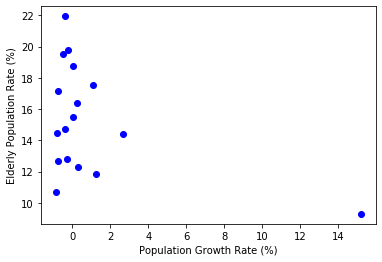

In [1]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

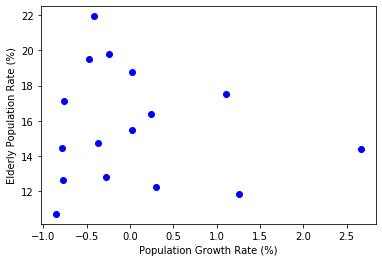

In [2]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


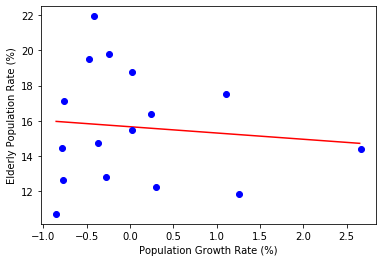

In [3]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 0.103969015 b: 7.0478935 loss: 83.93734
199 a: -0.13123423 b: 11.468195 loss: 27.389297
299 a: -0.26556936 b: 13.980558 loss: 12.626095
399 a: -0.326329 b: 15.117295 loss: 10.0848255
499 a: -0.3480299 b: 15.523306 loss: 9.802073
599 a: -0.354172 b: 15.638222 loss: 9.781769
699 a: -0.35555142 b: 15.664031 loss: 9.780831
799 a: -0.35579613 b: 15.668609 loss: 9.780804
899 a: -0.35583022 b: 15.669244 loss: 9.780804
999 a: -0.35583338 b: 15.669303 loss: 9.780804


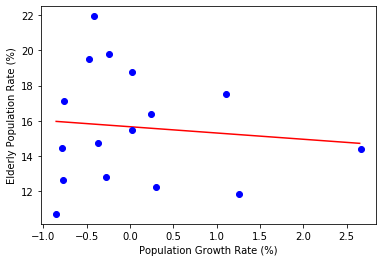

In [4]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [1]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 4.137336 b: -5.9704413 c: 6.0521073 loss: 73.754364
199 a: 3.0175176 b: -4.8677154 c: 9.909769 loss: 34.54899
299 a: 1.4585724 b: -2.5488143 c: 12.620012 loss: 17.396912
399 a: 0.44318408 b: -1.0301464 c: 14.363494 loss: 11.431122
499 a: -0.11927134 b: -0.18937132 c: 15.331721 loss: 9.841997
599 a: -0.39033294 b: 0.21577619 c: 15.798577 loss: 9.515223
699 a: -0.5043434 b: 0.38618153 c: 15.994956 loss: 9.463183
799 a: -0.5462612 b: 0.44883394 c: 16.067158 loss: 9.456768
899 a: -0.55972606 b: 0.46895856 c: 16.090353 loss: 9.456159
999 a: -0.5634921 b: 0.47458753 c: 16.09684 loss: 9.456113


<Figure size 640x480 with 1 Axes>

99 a: -1.4378476 b: 6.4167223 c: -3.561736 d: 6.6185374 loss: 59.13391
199 a: -2.0709357 b: 6.97668 c: -2.1467912 d: 10.083965 loss: 30.001514
299 a: -1.6301138 b: 4.9856615 c: -0.90244365 d: 12.21963 loss: 19.58176
399 a: -0.84496653 b: 2.549816 c: -0.5574346 d: 13.741308 loss: 13.7688675
499 a: -0.127454 b: 0.45336905 c: -0.46637693 d: 14.880826 loss: 10.588193
599 a: 0.4190098 b: -1.1258969 c: -0.4267058 d: 15.713569 loss: 9.042555
699 a: 0.7995317 b: -2.223506 c: -0.402549 d: 16.288906 loss: 8.377594
799 a: 1.0467962 b: -2.936463 c: -0.38728732 d: 16.662115 loss: 8.123884
899 a: 1.1973718 b: -3.3705835 c: -0.37806538 d: 16.889267 loss: 8.038023
999 a: 1.283373 b: -3.618522 c: -0.3728113 d: 17.018984 loss: 8.012277


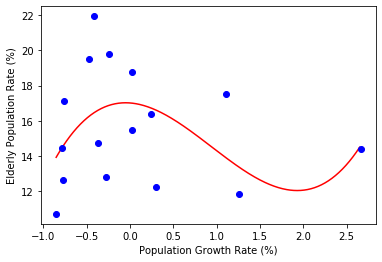

In [2]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [3]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 1s 85ms/sample - loss: 254.4987
Epoch 2/10
16/16 [==============================] - 0s 892us/sample - loss: 91.0415
Epoch 3/10
16/16 [==============================] - 0s 930us/sample - loss: 12.5789
Epoch 4/10
16/16 [==============================] - 0s 910us/sample - loss: 9.9366
Epoch 5/10
16/16 [==============================] - 0s 899us/sample - loss: 9.6158
Epoch 6/10
16/16 [==============================] - 0s 888us/sample - loss: 9.5698
Epoch 7/10
16/16 [==============================] - 0s 886us/sample - loss: 9.5490
Epoch 8/10
16/16 [==============================] - 0s 880us/sample - loss: 9.5299
Epoch 9/10
16/16 [==============================] - 0s 920us/sample - loss: 9.5092
Epoch 10/10
16/16 [==============================] - 0s 914us/sample - loss: 9.4860


In [5]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[15.787237 ],
       [15.830116 ],
       [14.976889 ],
       [15.886375 ],
       [15.1327915],
       [15.814898 ],
       [15.922972 ],
       [15.908962 ],
       [15.833683 ],
       [15.919916 ],
       [15.803307 ],
       [15.916414 ],
       [15.923416 ],
       [15.888815 ],
       [15.837181 ],
       [13.886393 ]], dtype=float32)

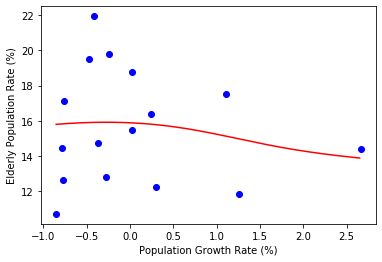

In [6]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

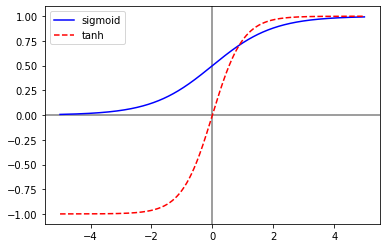

In [7]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()